changed to use constant cloud fraction of 0, but no difference in PAR from R07; ????

- How are plankton concentrations initialized?

In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import pytz

%matplotlib inline

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGR08/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')

In [3]:
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

In [4]:
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=202)
# Timestamp in matplotlib time
# dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400

In [5]:
filename2='/data/eolson/SOG/SOG-runs/SOGR07/profiles/hoff-SOG.dat'
file_obj2 = open(filename2, 'rt')
for index, line in enumerate(file_obj2):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data2 = pd.read_csv(filename2, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=202)
# Timestamp in matplotlib time
# dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400

In [6]:
interval=float(interval)
print interval

0.042


In [7]:
# Extract dataframe chunks into dictionary

for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
        
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1)
tt,zz=np.meshgrid(t,-z)

In [8]:
# Extract dataframe chunks into dictionary

for index, chunk in enumerate(data2):
    if index==0:
        da2=chunk
    else:
        da2=np.dstack((da,chunk))
        
z2=da2[:,0,0]
t2=np.arange(da2.shape[2])
t2=(t2+1)
tt2,zz2=np.meshgrid(t2,-z2)

In [9]:
print field_names

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


In [10]:
field_names[1]

'temperature'

In [11]:
print z.size
print t.size
print da[:,12,:].shape

202
961
(202, 961)


In [12]:
iii=0;

1


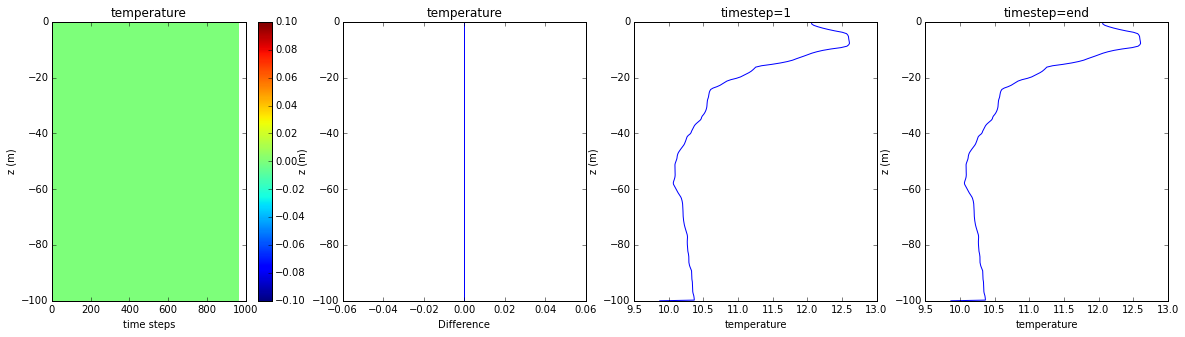

In [13]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,1:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

2


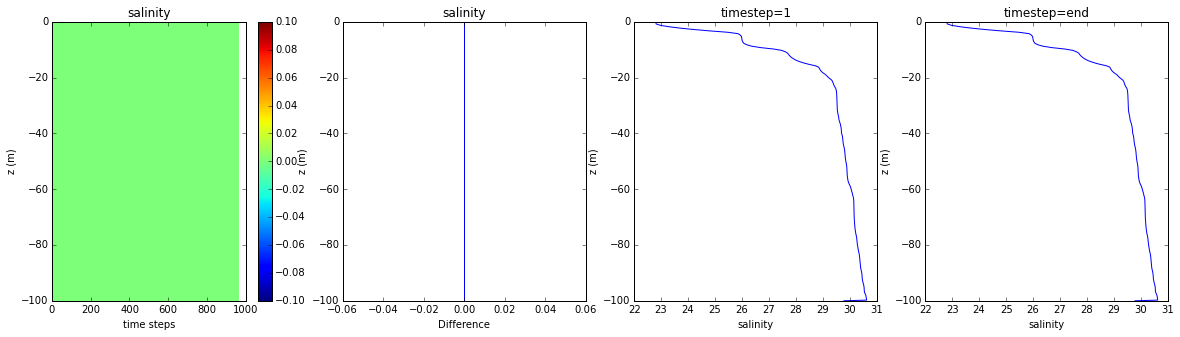

In [14]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,1:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

3


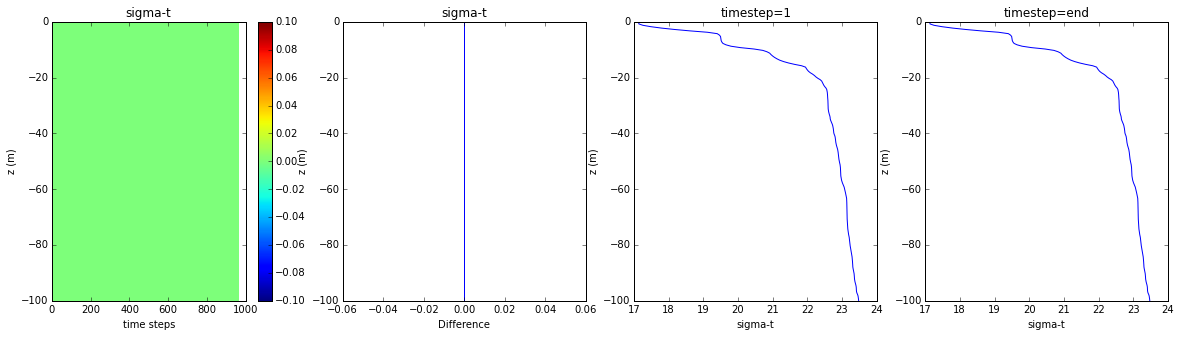

In [15]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,1:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

4


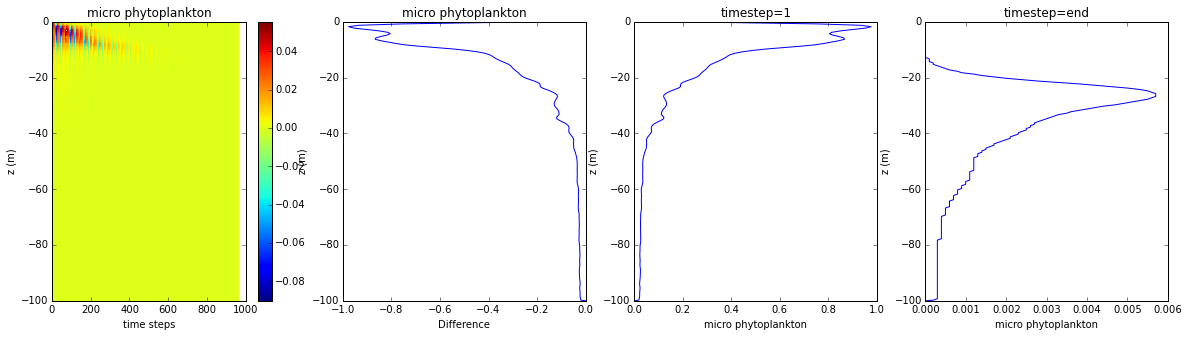

In [16]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,1:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

5


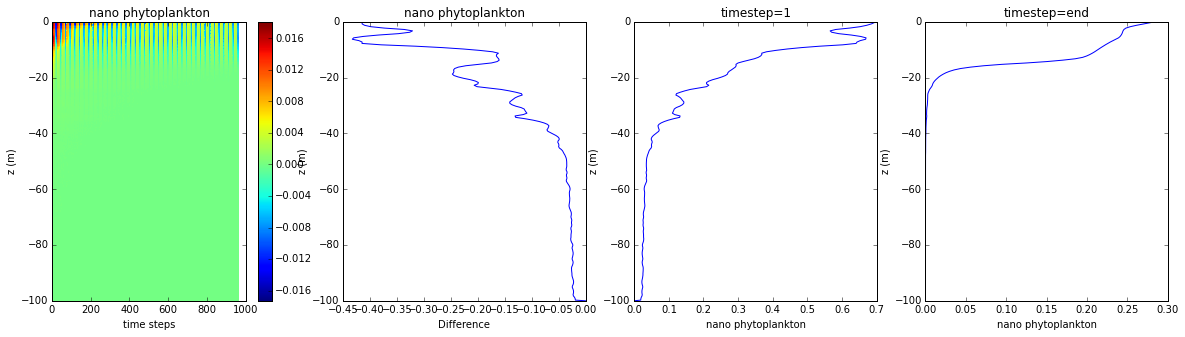

In [17]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,1:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

6


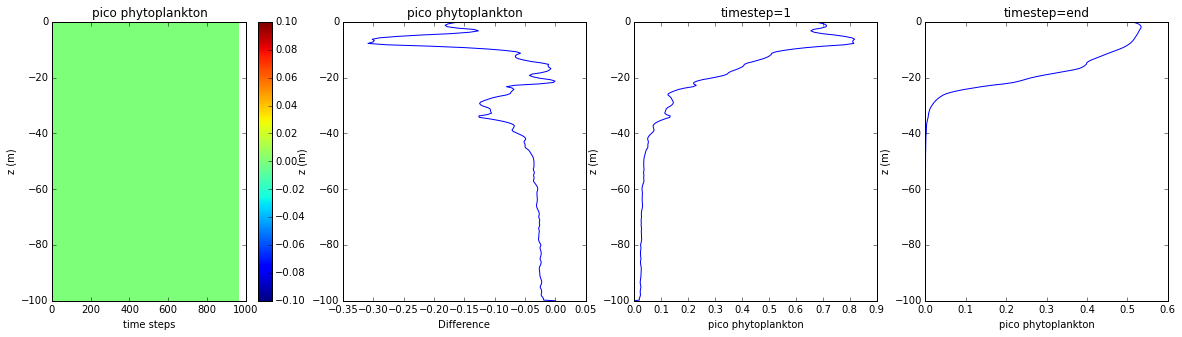

In [18]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

7


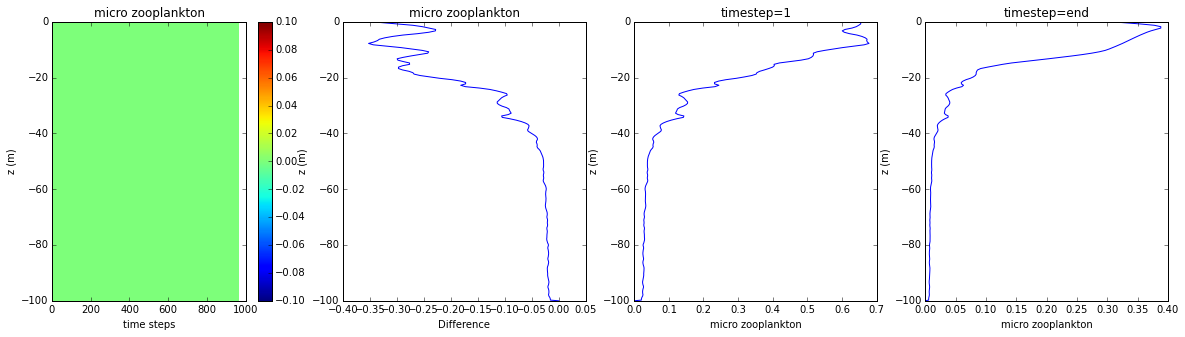

In [19]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

8


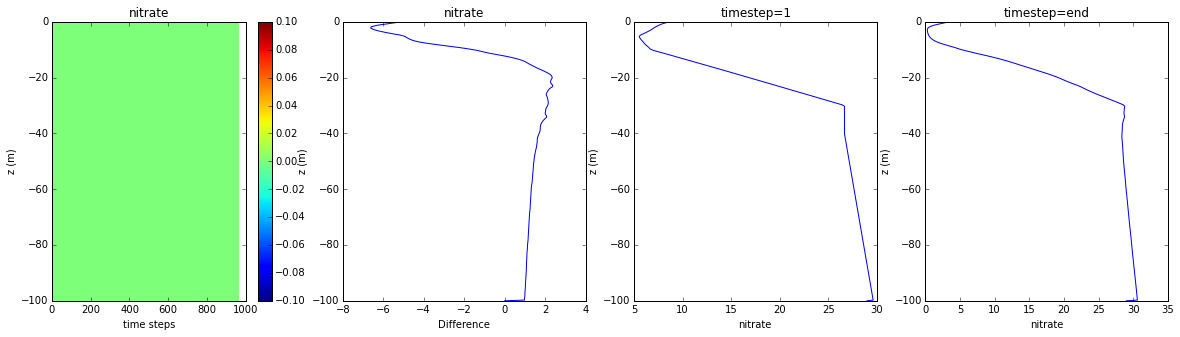

In [20]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

9


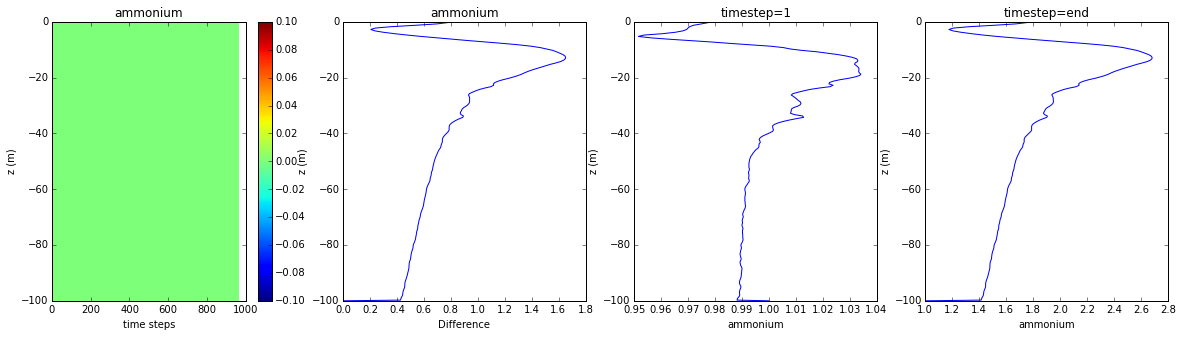

In [21]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

10


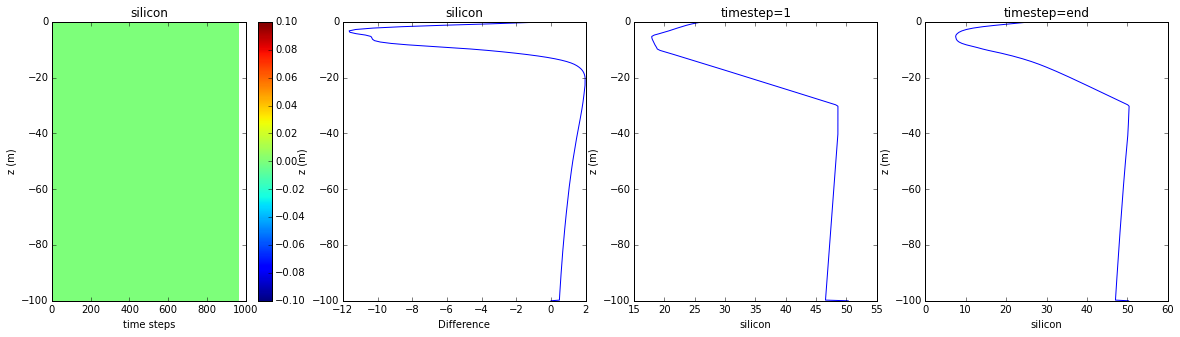

In [22]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

11


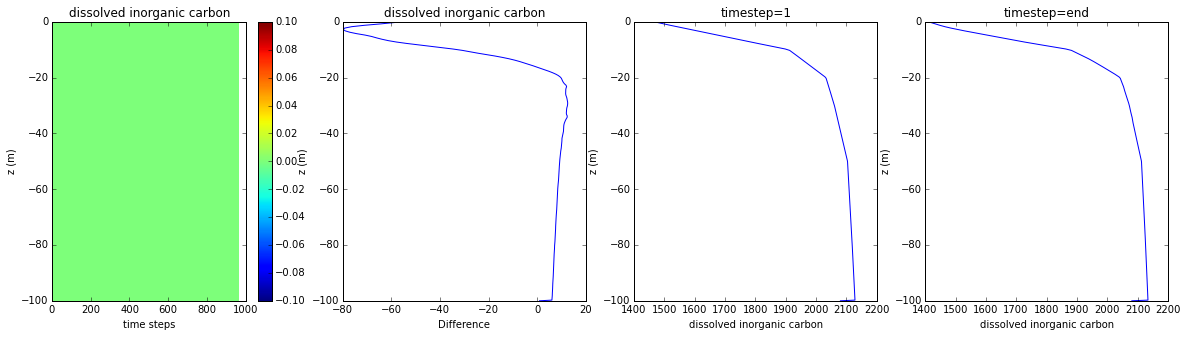

In [23]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

12


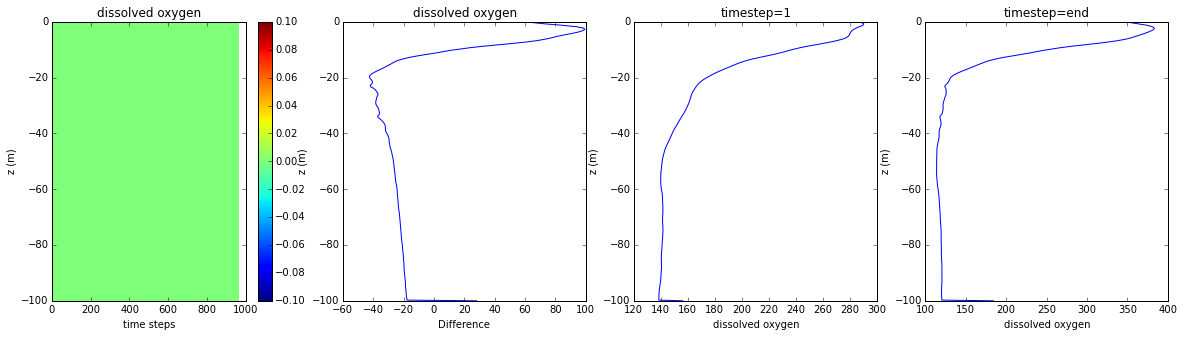

In [24]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

13


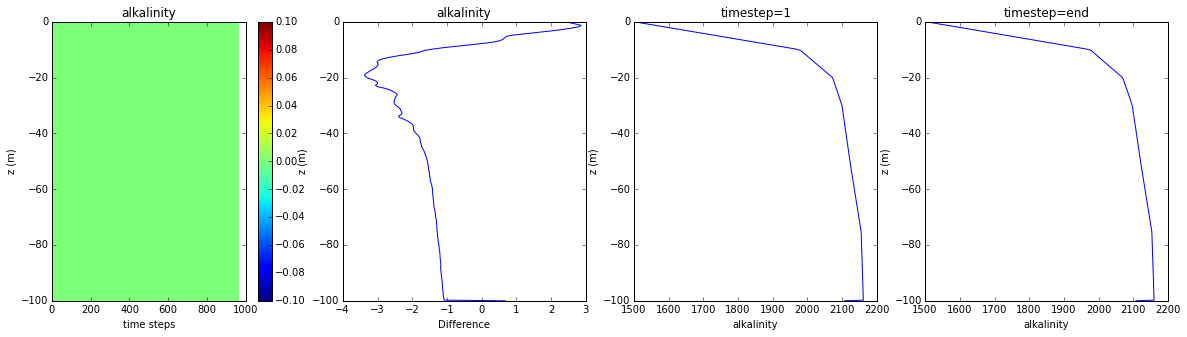

In [25]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

14


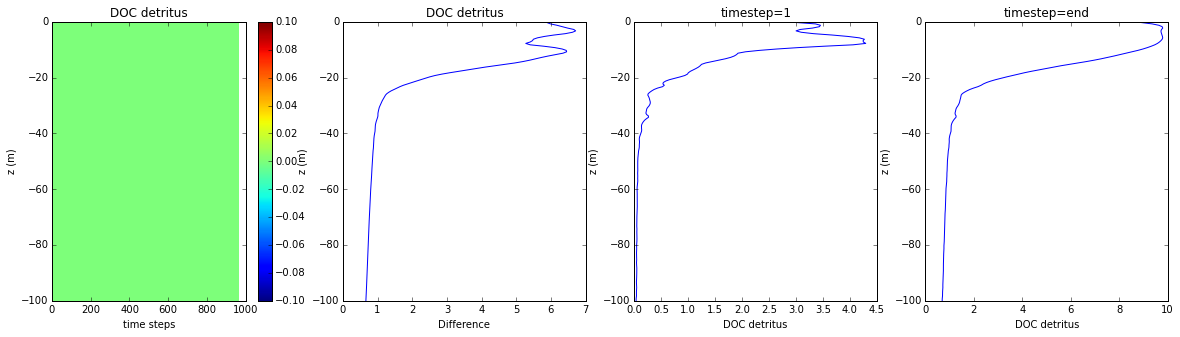

In [26]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

15


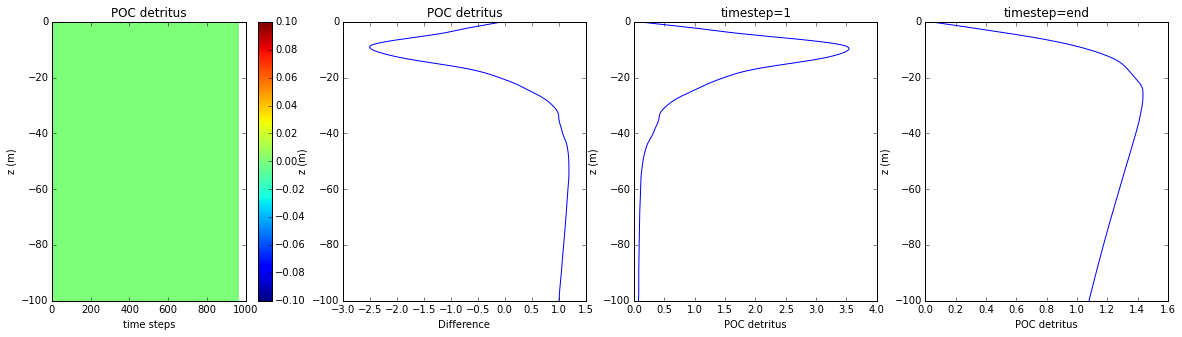

In [27]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

16


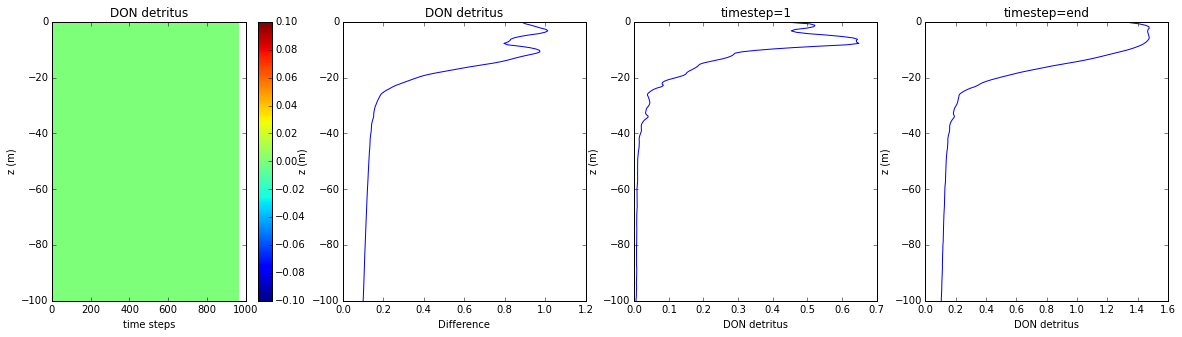

In [28]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

17


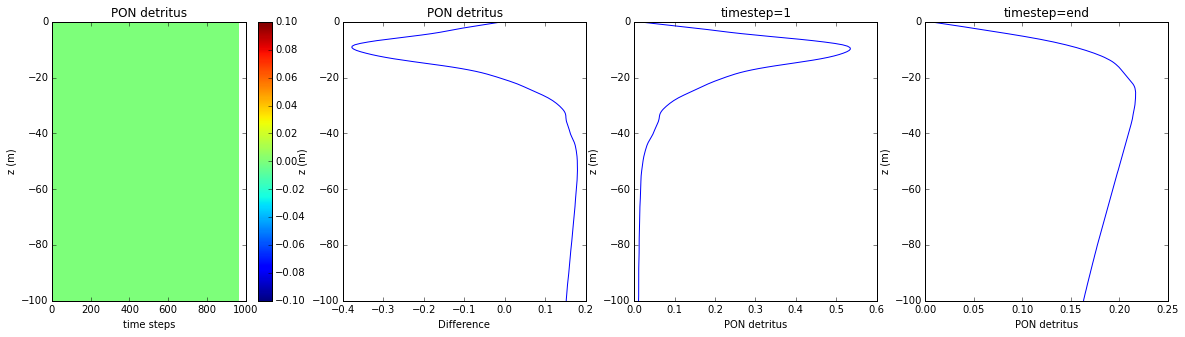

In [29]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

18


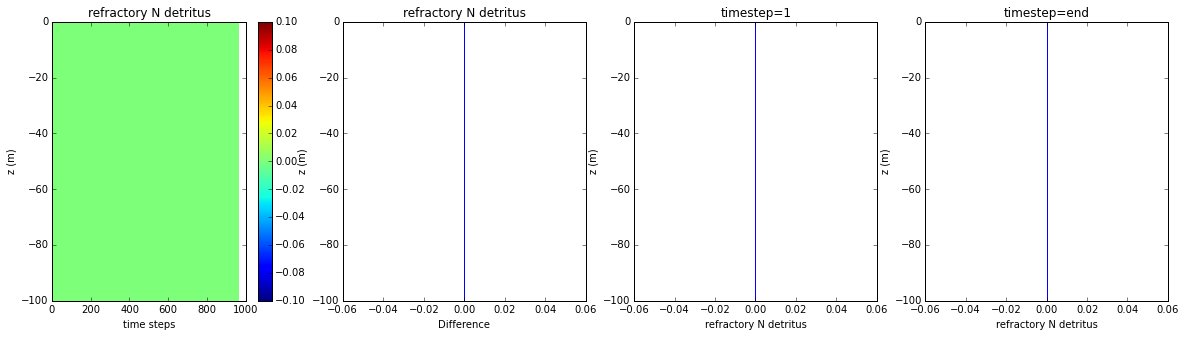

In [30]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

19


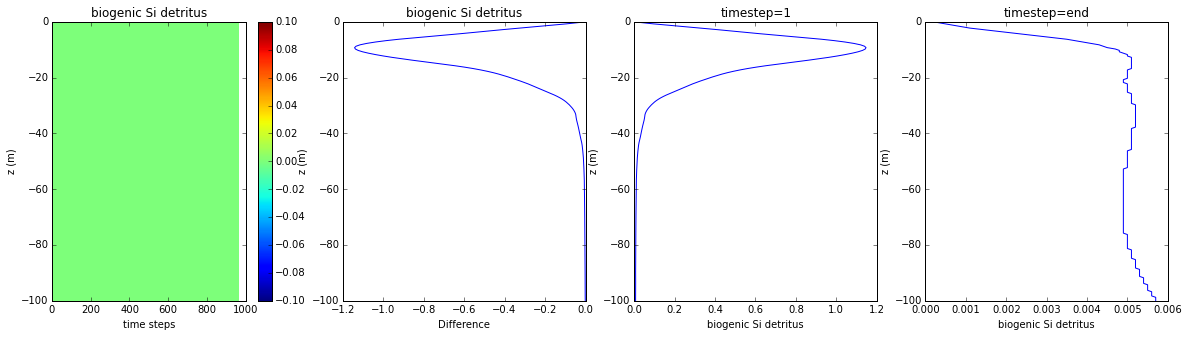

In [31]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [32]:
iii+=1
print iii


20


In [33]:
iii+=1
print iii


21


In [34]:
iii+=1
print iii


22


23


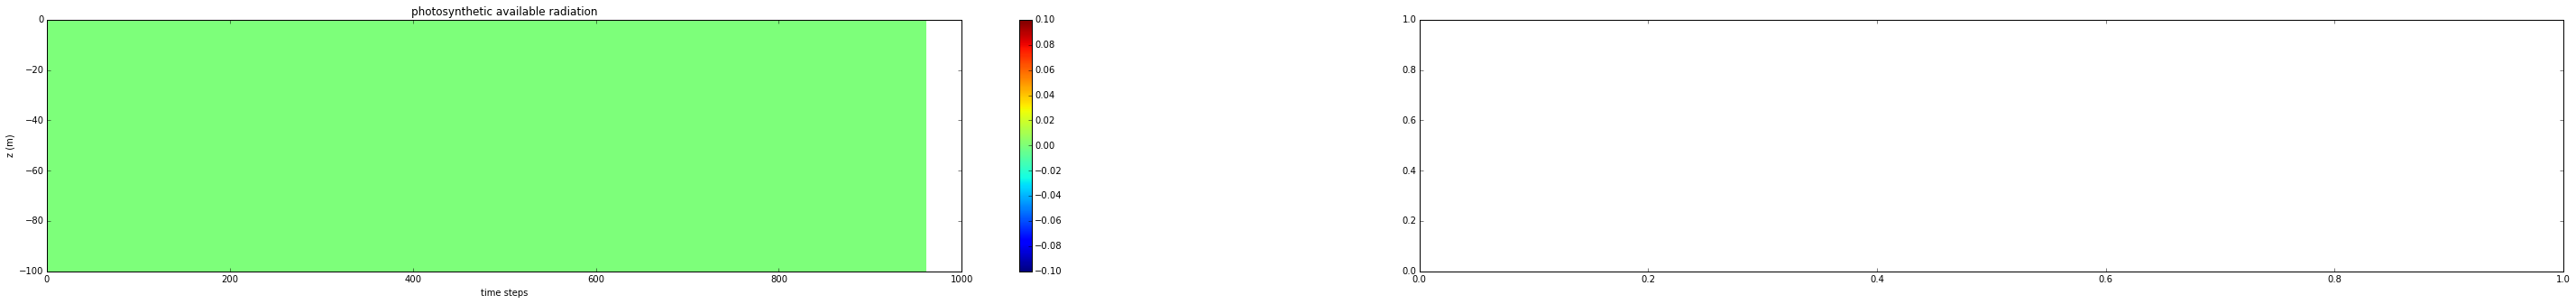

In [35]:
iii+=1
print iii

fig, axs = plt.subplots(1,2,figsize=(50,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:]-da2[:,iii,:da2.shape[2]-1])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])


In [36]:
iii+=1
print iii

24


In [ ]:
iii+=1
print iii